<a href="https://colab.research.google.com/github/jgomezpe/MinTic2021/blob/main/ElDespertarProgramador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Triqui

In [ ]:
import random

#Imprime el tablero de triqui
def imprimir(A):
  for i in range(len(A)):
    if i>0:
      print('-+-+-')
    for j in range(len(A[i])):
      if j>0:
        print('|',end='')
      print(A[i][j],end='')
    print()
  print('================')

# Crea el tablero incial de triqui
def inicial():
  return [[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']]

# Determina las casillas que están vacias en el tablero
def vacias(A):
  v = []
  for i in range(3):
    for j in range(3):
      if A[i][j]==' ':
        v.append((i,j))
  return v

# Calcula el movimiento del jugador
def jugar(A, jugador):
  v = vacias(A)
  i,j = v[random.randrange(len(v))] # de manera aleatoria
  A[i][j] = jugador
  return A

# Determina si el jugador ganó o no
def ganador(A, jugador):
  # Revisa diagonal principal
  if (A[0][0]==jugador and A[1][1]==jugador and A[2][2]==jugador):
    return True
  # Revisa diagonal contraria  
  if (A[0][2]==jugador and A[1][1]==jugador and A[2][0]==jugador):
    return True
  
  for i in range(3):  
    # Revisa la i-ésima fila
    if (A[i][0]==jugador and A[i][1]==jugador and A[i][2]):
      return True
    # Revisa la columna i-ésima  
    if (A[0][i]==jugador and A[1][i]==jugador and A[2][i]):
      return True
  return False  

# Programa principal
def main():
  tablero = inicial()
  jugador = 'X'
  imprimir(tablero)
  for i in range(9):
    tablero = jugar(tablero,jugador)
    imprimir(tablero)
    if ganador(tablero,jugador):
      print('El ganador es ', jugador)
      return 
    if jugador=='X':
      jugador='O'
    else:
      jugador='X'
  print('Empate')

main()

# Sudoku

In [ ]:
# Lee el tablero de sudoku
def leer():
  A = []
  for i in range(9):
    linea = input()
    A.append(list(linea))
  return A

# Imprime el tablero de sudoku
def imprimir(A):
  for i in range(len(A)):
    if i%3==0:
      print('+---+---+---+')
    for j in range(len(A[i])):
      if j%3==0:
        print('|',end='')
      if A[i][j]!='0':
        print(A[i][j],end='')
      else:
        print(' ',end='')
    print('|')
  print('+---+---+---+')

# Encuentra la primer casilla vacia de arriba a abajo, izquierda a derecha
def casilla_vacia(A):
  for i in range(9):
    for j in range(9):
      if A[i][j] == '0':
        return (i,j)
  return None

# Mira la fila para ver si es posible o no poner el número k en la casilla i,j 
def valido_en_fila(A, i, j, k):
  for m in range(9):
    if A[i][m] == k:
      return False
  return True

# Mira la columna para ver si es posible o no poner el número k en la casilla i,j 
def valido_en_columna(A, i, j, k):
  for m in range(9):
    if A[m][j] == k:
      return False
  return True

# Mira el recuadro para ver si es posible o no poner el número k en la casilla i,j 
def valido_en_celda(A, i, j , k):
  celda_fila = 3*(i//3)
  celda_columna = 3*(j//3)
  for n in range(celda_fila,celda_fila+3):
    for m in range(celda_columna,celda_columna+3):
      if A[n][m] == k:
        return False
  return True

# Mira si es posible poner el número k en la casilla i,j
def valido(A,i,j,k):
  return valido_en_fila(A,i,j,k) and valido_en_columna(A,i,j,k) and valido_en_celda(A,i,j,k)

# Soluciona el sudoku
def solucionar(A):
  x = casilla_vacia(A)
  if x!=None:
    i,j = x
    for k in range(1,10):
      v = str(k)
      if valido(A,i,j,v):
        A[i][j] = v
        solucionar(A)
        if casilla_vacia(A)==None:
          return A
        else:
          A[i][j] = '0'
  return A

# Programa principal
imprimir(solucionar(leer()))

# Sierpinski


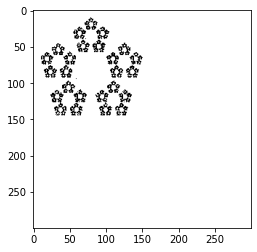

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from random import randrange
from numpy import ones
from time import sleep

# Tamaño de la imagen a generar
N = 300
# Valores necesarios
# Vertices de la figura
VERTICES = [[30,150],[270,30],[270,270]]
#VERTICES = [[30,30],[30,270],[270,270],[270,30]]
#VERTICES = [[20,150],[120,280],[270,238],[270,62],[120,20]]
# Punto inicial en la mitad de la imagen
p = [150,150]
# Inicia imagen en blanco (1)
# Pinta la imagen
imagen = ones((N, N))
plt.imshow( imagen, cmap='gray', vmin=0, vmax=1)
plt.show()
clear_output(wait=True)
# Genera puntos siguiendo la idea de Sierpinski
for i in range(10000):
  v = randrange(len(VERTICES))
  p[0] = (p[0]+VERTICES[v][0])//2
  p[1] = (p[1]+VERTICES[v][1])//2
  #p[0] = p[0]*35//100+VERTICES[v][0]*65//100
  #p[1] = p[1]*35//100+VERTICES[v][1]*65//100
  # Vuelve negro el punto (0 es negro)
  imagen[p[0]][p[1]] = 0 
# Pinta la imagen final
plt.imshow(imagen, cmap='gray', vmin=0, vmax=1)
plt.show()
clear_output(wait=True)

# Juego de la Vida

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from random import randrange
from numpy import ones
from time import sleep

def iniciar(SIZE):
  imagen = ones((SIZE,SIZE))
  for i in range(SIZE*SIZE//10):
    x = randrange(SIZE)
    y = randrange(SIZE)
    imagen[y][x] = 0.0
  return imagen

def viva(imagen, y, x):
  return imagen[y][x] == 0.0

def vecinos(imagen, SIZE, y, x):
  c = 0
  for i in range(-1,2):
    vy = (y + i + SIZE)%SIZE
    for j in range(-1,2):
      vx = (x + j + SIZE)%SIZE
      if (y!=vy or x!=vx) and viva(imagen,vy,vx):
        c += 1
  return c

def actualiza(imagen, SIZE):
  nueva = imagen.copy()
  for y in range(SIZE):
    for x in range(SIZE):
      c = vecinos(imagen,SIZE,y,x)
      if viva(imagen,y,x):
        if c<2 or c>3:
          nueva[y][x] = 1.0
      else:
        if c==3:
          nueva[y][x] = 0.0
  return nueva

SIZE = 200
imagen = iniciar(SIZE)
plt.imshow( imagen, cmap='gray', vmin=0, vmax=1)
plt.show()
clear_output(wait=True)
for i in range(1000):
  imagen = actualiza(imagen,SIZE)
  plt.imshow( imagen, cmap='gray', vmin=0, vmax=1)
  plt.show()
  clear_output(wait=True)